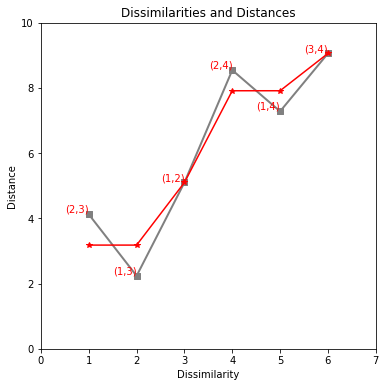

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

def PAV(X, Y, FUN=np.mean, left=True, ordered=False, **kwargs):
    n = len(Y)
    assert n > 1 and n == len(X) and not np.any(np.isnan(np.concatenate((X, Y)))), "Invalid input parameters"

    if not ordered:
        order = np.argsort(X)
        Y = Y[order]
        X = X[order]

    Y_hat = Y.copy()
    work_index = np.arange(1, n+1)

    if left:
        main_index = np.arange(0, n-1)
        while True:
            increasing = np.diff(Y_hat) < 0
            if not np.any(increasing):
                break
            else:
                i = min(main_index[increasing])
                i_and_ii = np.isin(work_index, work_index[i:i+2])
                Y_hat[i_and_ii] = FUN(Y_hat[i_and_ii], **kwargs)
                work_index[i_and_ii] = work_index[i]
    else:
        main_index = np.arange(1, n)
        while True:
            decreasing = np.diff(Y_hat) < 0
            if not np.any(decreasing):
                break
            else:
                i = max(main_index[decreasing])
                i_and_ii = np.isin(work_index, work_index[i-1:i+1])
                Y_hat[i_and_ii] = FUN(Y_hat[i_and_ii], **kwargs)
                work_index[i_and_ii] = work_index[i]

    return {'Y_hat': Y_hat, 'Y': Y, 'X': X}



# Create a NumPy array
x = np.array([[3, 2, 1, 10], [2, 7, 3, 4]]).T

# Calculate the distance matrix
d = squareform(pdist(x, 'euclidean'))

# Prepare data
d1 = [1, 2, 3, d[0, 1]]
d2 = [1, 3, 2, d[0, 2]]
d3 = [1, 4, 5, d[0, 3]]
d4 = [2, 3, 1, d[1, 2]]
d5 = [2, 4, 4, d[1, 3]]
d6 = [3, 4, 6, d[2, 3]]
delta = np.array([d1, d2, d3, d4, d5, d6]).T

# Prepare scatter plot data
f1 = [1, d[1, 2]]
f2 = [2, d[0, 2]]
f3 = [3, d[0, 1]]
f4 = [4, d[1, 3]]
f5 = [5, d[0, 3]]
f6 = [6, d[2, 3]]
fig = np.array([f1, f2, f3, f4, f5, f6])
plt.figure(figsize=(6,6))

# Plot scatter graph
plt.scatter(fig[:, 0], fig[:, 1], c='gray', marker='s', label='Distances')
plt.xlim(0, 7)
plt.ylim(0, 10)
plt.xlabel('Dissimilarity')
plt.ylabel('Distance')
plt.title('Dissimilarities and Distances')
# plt.grid(True)

# Draw lines
plt.plot(fig[:, 0], fig[:, 1], 'b-', lw=2, color='gray')

# Add text annotations
labels = ["(2,3)", "(1,3)", "(1,2)", "(2,4)", "(1,4)", "(3,4)"]
for i, label in enumerate(labels):
    plt.text(fig[i, 0], fig[i, 1], label, color='red', verticalalignment='bottom', horizontalalignment='right')

# Assume 'pav' is a function defined earlier that calculates the pooled adjacent violators algorithm for isotonic regression.
# Since 'pav' function is not defined here, we cannot execute this code as is. 
# This line would be plotting the result of applying the 'pav' function to the second column of fig.
y_1 = PAV(fig[:,0],fig[:,1])
plt.plot(fig[:,0], y_1['Y_hat'], color='red', marker='*')

# Save the figure to a file
plt.savefig("dd.png", transparent=True)

# Display the figure
plt.show()
